# [DM FA24] CS 2302 - Exam 2 Part I

## **Before you start**

Make a copy of this Colab by clicking on File > Save a Copy in Drive


In [23]:
#@title  { run: "auto", display-mode: "form" }
student_id = "80532860" #@param {type:"string"}
first_name = "Eric" #@param {type:"string"}
last_name = "Quezada" #@param {type:"string"}
seat_number = "153" #@param {type:"string"}

Total numbers of points: 48 (graded out of 40)

## **Academic Integrity**

By taking and submitting this exam you confirm that you did not receive any outside help. This includes notes, books, online resources, or any other person.

You are permitted to use the provided python cheat sheet, blank scratch paper, and pencil/pen to work out problems.

## Binary Search Trees Section

### [8 points] Problem 1
Complete the implementation of the _height method. This method computes the height of a binary search tree (The parameter node represents the root of the [sub]tree).  The height of an empty tree is -1. The height of a tree with only one node is 0.





### [8 points] Problem 2
Complete the implementation of the _num_nodes_at_depth method. This method returns the number of nodes at depth d of a binary search tree (The parameter node represents the root of the [sub]tree).  




### [8 points] Problem 3
Complete the implementation of the _min_val method. This method returns the smallest value in a binary search tree. (The parameter node represents the root of the [sub]tree).  If the tree is empty, return float("inf").



### [8 points] Problem 4
Complete the implementation of the *_num_leaves* method. This method counts and returns the number of leaves in a binary search tree (The parameter node represents the root of the [sub]tree). Return 0 if the tree is empty.


### [8 points] Problem 5
Complete the implentation of _range_count. This method returns the number of nodes with value between
*min_val*
and
*max_val*
(exclusive). Assume the tree is a
**binary search tree**
. You MUST make use of the search property to receive credit.


	Examples:

            7
          /    \
        3      10      
      /   \   /   \
    -1    5   9    12

    min_val = 2, max_val = 10  →  4
    min_val = 3, max_val = 8  →  2
    min_val = 10, max_val = 20  → 1
    min_val = 20, max_val = 30  → 0



### [8 points] Problem 6 - BONUS (Optional)
Complete the implentation of _max_leaf_sum. This method returns the largest sum you can obtain by adding all the values in the path from the root to any leaf in the tree.

	Examples:

            7
          /    \
        3      10      -> 29
      /   \   /   \
    -1    5   9    12

    
            7
          /    \
        5       8      -> 18
      /   \   
    -1     6   

            10
          /    \
        9      11      -> 27
      /       
     8            


In [24]:
# For all questions, use the following class definitions
#******************************************************************************
#DO NOT MODIFY THE CODE BELOW
#******************************************************************************
class Node:
  def __init__(self, key):
      self.left = None
      self.right = None
      self.item = key

class BinaryTree:
  def __init__(self):
      self.root = None

  def insert(self, key):
      # If the tree is empty, set root
      if self.root is None:
          self.root = Node(key)
      else:
          self._insert_recursive(self.root, key)

  def _insert_recursive(self, current_node, key):
      if key < current_node.item:
          if current_node.left is None:
              current_node.left = Node(key)
          else:
              self._insert_recursive(current_node.left, key)
      else:
          if current_node.right is None:
              current_node.right = Node(key)
          else:
              self._insert_recursive(current_node.right, key)

  def inorder_traversal(self, node):
      if node:
          self.inorder_traversal(node.left)
          print(node.item, end=' ')
          self.inorder_traversal(node.right)
#******************************************************************************
#DO NOT MODIFY THE CODE ABOVE
#******************************************************************************

  # --------------------------------------------------------------------------------------------------------------
  # Problem 1
  # --------------------------------------------------------------------------------------------------------------
  # DO NOT CHANGE THIS FUNCTION
  def height(self):
    return self._height(self.root)


  def _height(self, node):
    # Write your code here
    if node is None:
      return -1

    left = self._height(node.left)
    right = self._height(node.right)

    return max(left, right) + 1


  # --------------------------------------------------------------------------------------------------------------
  # Problem 2
  # --------------------------------------------------------------------------------------------------------------
  # DO NOT CHANGE THIS FUNCTION
  def num_nodes_at_depth(self, d):
    return self._num_nodes_at_depth(self.root, d)

  def _num_nodes_at_depth(self, node, d):
    # Write your code here
    if node is None:
      return 0
    if d == 0:
      return 1
    nl = self._num_nodes_at_depth(node.left, d -1)
    nr = self._num_nodes_at_depth(node.right, d -1)
    return nl + nr


  # --------------------------------------------------------------------------------------------------------------
  # Problem 3
  # --------------------------------------------------------------------------------------------------------------
  # DO NOT CHANGE THIS FUNCTION
  def min_val(self):
    return self._min_val(self.root)

  def _min_val(self, node):
    # Write your code here
    if node is None:
      return float("inf")
    return min(node.item, self._min_val(node.left), self._min_val(node.right))

  # --------------------------------------------------------------------------------------------------------------
  # Problem 4
  # --------------------------------------------------------------------------------------------------------------
  # DO NOT CHANGE THIS FUNCTION
  def num_leaves(self):
    return self._num_leaves (self.root)

  def _num_leaves(self, node):
    # Write your code here
    if node is None:
      return 0
    if node.right is None and node.left is None:
      return 1
    return self._num_leaves(node.left) + self._num_leaves(node.right)

  # --------------------------------------------------------------------------------------------------------------
  # Problem 5
  # --------------------------------------------------------------------------------------------------------------
  # DO NOT CHANGE THIS FUNCTION
  def range_count(self, min_val, max_val):
    return self._range_count(min_val, max_val, self.root)


  def _range_count(self, min_val, max_val, node):
    # Write your code here
      if node is None:
        return 0
      count = 0
      if min_val < node.item < max_val:
         count += 1
      count += self._range_count(min_val, max_val, node.left)
      count += self._range_count(min_val, max_val, node.right)
      return count
  # --------------------------------------------------------------------------------------------------------------
  # Problem 6 - BONUS
  # --------------------------------------------------------------------------------------------------------------
  # DO NOT CHANGE THIS FUNCTION
  def max_leaf_sum(self):
    return self._max_leaf_sum(self.root)

  def _max_leaf_sum(self, node):
      # Write your code here
      if node is None:
        return 0
      if node.right is None and node.left is None:
        return node.item
      return max(node.item + self._max_leaf_sum(node.left), node.item + self._max_leaf_sum(node.right))


In [25]:
#******************************************************************************
#DO NOT MODIFY THE CODE BELOW
#******************************************************************************
import matplotlib.pyplot as plt
import numpy as np
def _draw_binary_tree(root, x0, x1, y, y_inc,ax):
    if root is not None:
        xm = (x0+x1)/2
        yn = y-y_inc
        if root.left is not None:
            p=np.array([[xm,y], [(x0+xm)/2,yn]])
            ax.plot(p[:,0],p[:,1],linewidth=1,color='k')
            _draw_binary_tree(root.left,x0,xm,yn, y_inc,ax)
        if root.right is not None:
            p=np.array([[xm,y], [(x1+xm)/2,yn]])
            ax.plot(p[:,0],p[:,1],linewidth=1,color='k')
            _draw_binary_tree(root.right,xm,x1,yn, y_inc,ax)
        ax.plot([xm,xm],[y,y],linewidth=1,color='k')
        ax.text(xm,y, str(root.item), size=10,ha="center", va="center",
            bbox=dict(facecolor='w',boxstyle="circle"))


def draw_binary_tree(root):
    if root is None:
      print("<Empty Tree>")
      return

    fig, ax = plt.subplots()
    _draw_binary_tree(root, 0, 200, 400, 20, ax)
    ax.set_aspect(1.0)
    ax.axis('off')
    plt.show()
#******************************************************************************
#DO NOT MODIFY THE CODE ABOVE
#******************************************************************************

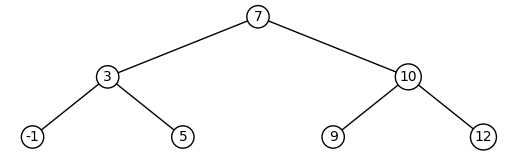

In [26]:
# Write any useful test cases here
bt = BinaryTree()
bt.insert(7)
bt.insert(3)
bt.insert(10)
bt.insert(-1)
bt.insert(5)
bt.insert(9)
bt.insert(12)
draw_binary_tree(bt.root)


## How to Submit This Exam

1. File > Download .ipynb
2. Go to Blackboard, find the lab submission page, and upload the .ipynb file you just downloaded.

## Autograder - DO NOT MODIFY

In [27]:
CODING_POINTS = 8.0
points_by_problem = []

def grade_bst():
    print("\n-- Binary Search Trees Section --")

    section_points = 0

    # ---------- _height tests ----------
    passed_tests = 0
    num_tests = 6

    try:

        def check_answer(tree, ans):
          output = tree.height()
          if output == ans:
            return 1

          print("Problem 10 - Error - Your code output:", output, " Expected output: ", ans, " Input:")
          draw_binary_tree(tree.root)
          return 0
        tree = BinaryTree()
        passed_tests += check_answer(tree, -1)

        tree.insert(7)
        passed_tests += check_answer(tree, 0)

        tree.insert(3)
        tree.insert(10)
        passed_tests += check_answer(tree, 1)

        tree.insert(-1)
        tree.insert(5)
        passed_tests += check_answer(tree, 2)

        tree.insert(9)
        tree.insert(12)
        passed_tests += check_answer(tree, 2)

        tree.insert(16)
        tree.insert(20)
        passed_tests += check_answer(tree, 4)



    except Exception as ex:
        print("[Problem 1] Exception thrown: ", ex)

    problem_points = (passed_tests / num_tests) * CODING_POINTS

    print("[Problem 1]", problem_points, "/", CODING_POINTS)

    section_points += problem_points
    points_by_problem.append(problem_points)

    # ---------- _num_nodes_at_depth tests ----------
    passed_tests = 0
    num_tests = 4

    try:

        def check_answer(tree, d, ans):
          output = tree.num_nodes_at_depth(d)
          if output == ans:
            return 1

          print("Problem 2 - Error - Your code output:", output, " Expected output: ", ans, " Input: d=", d)
          draw_binary_tree(tree.root)
          return 0

        tree = BinaryTree()
        tree.insert(7)
        tree.insert(3)
        tree.insert(10)
        tree.insert(5)

        passed_tests += check_answer(tree, 2, 1)
        passed_tests += check_answer(tree, 1, 2)
        passed_tests += check_answer(tree, 10, 0)
        passed_tests += check_answer(tree, 0, 1)


    except Exception as ex:
        print("[Problem 2] Exception thrown: ", ex)

    problem_points = (passed_tests / num_tests) * CODING_POINTS

    print("[Problem 2]", problem_points, "/", CODING_POINTS)

    section_points += problem_points
    points_by_problem.append(problem_points)

    # ---------- _min_val tests ----------
    passed_tests = 0
    num_tests = 4

    try:

        def check_answer(tree, ans):
          output = tree.min_val()
          if output == ans:
            return 1

          print("Problem 3 - Error - Your code output:", output, " Expected output: ", ans, " Input:")
          draw_binary_tree(tree.root)
          return 0



        tree = BinaryTree()
        passed_tests += check_answer(tree, float("inf"))

        tree.insert(7)
        tree.insert(3)
        tree.insert(10)
        tree.insert(5)
        passed_tests += check_answer(tree, 3)

        tree.insert(1)
        passed_tests += check_answer(tree, 1)

        tree.insert(-11)
        passed_tests += check_answer(tree, -11)


    except Exception as ex:
        print("[Problem 3] Exception thrown: ", ex)

    problem_points = (passed_tests / num_tests) * CODING_POINTS

    print("[Problem 3]", problem_points, "/", CODING_POINTS)

    section_points += problem_points
    points_by_problem.append(problem_points)

  # ---------- _num_leaves tests ----------
    passed_tests = 0
    num_tests = 7

    try:


        def check_answer(tree, ans):
          output = tree.num_leaves()
          if output == ans:
            return 1

          print("Problem 4 - Error - Your code output:", output, " Expected output: ", ans, " Input: ")
          draw_binary_tree(tree.root)
          return 0

        tree = BinaryTree()
        passed_tests += check_answer(tree, 0)

        tree.insert(7)
        passed_tests += check_answer(tree, 1)

        tree.insert(3)
        passed_tests += check_answer(tree, 1)

        tree.insert(10)
        tree.insert(5)
        passed_tests += check_answer(tree, 2)


        tree.insert(11)
        tree.insert(13)
        passed_tests += check_answer(tree, 2)

        tree.insert(6)
        tree.insert(-1)
        tree.insert(4)
        passed_tests += check_answer(tree, 4)

        tree.insert(8)
        passed_tests += check_answer(tree, 5)


    except Exception as ex:
        print("[Problem 4] Exception thrown: ", ex)

    problem_points = (passed_tests / num_tests) * CODING_POINTS

    print("[Problem 4]", problem_points, "/", CODING_POINTS)

    section_points += problem_points
    points_by_problem.append(problem_points)

      # ---------- _range_count tests ----------
    passed_tests = 0
    num_tests = 4

    try:

        def check_answer(tree, min_val, max_val, ans):
          output = tree.range_count(min_val, max_val)
          if output == ans:
            return 1

          print("Problem 5 - Error - Your code output:", output, " Expected output: ", ans, " Input: ")
          draw_binary_tree(tree.root)
          return 0

        tree = BinaryTree()
        tree.insert(7)
        tree.insert(3)
        tree.insert(10)
        tree.insert(-1)
        tree.insert(5)
        tree.insert(9)
        tree.insert(12)
        passed_tests += check_answer(tree, 2, 10, 4)
        passed_tests += check_answer(tree, 3, 8, 2)
        passed_tests += check_answer(tree, 10, 20, 1)
        passed_tests += check_answer(tree, 20, 30, 0)


    except Exception as ex:
        print("[Problem 5] Exception thrown: ", ex)

    problem_points = (passed_tests / num_tests) * CODING_POINTS

    print("[Problem 5]", problem_points, "/", CODING_POINTS)

    section_points += problem_points
    points_by_problem.append(problem_points)

# ---------- _max_leaf_sum tests ----------
    passed_tests = 0
    num_tests = 4

    try:

        def check_answer(tree, ans):
          output = tree.max_leaf_sum()
          if output == ans:
            return 1

          print("Problem 6 - Error - Your code output:", output, " Expected output: ", ans, " Input: ")
          draw_binary_tree(tree.root)
          return 0

        tree = BinaryTree()
        tree.insert(7)
        tree.insert(3)
        tree.insert(10)
        tree.insert(-1)
        tree.insert(5)
        tree.insert(9)
        tree.insert(12)
        passed_tests += check_answer(tree, 29)

        tree = BinaryTree()
        tree.insert(7)
        tree.insert(5)
        tree.insert(8)
        tree.insert(-1)
        tree.insert(6)
        passed_tests += check_answer(tree, 18)

        tree = BinaryTree()
        tree.insert(10)
        tree.insert(9)
        tree.insert(11)
        tree.insert(8)
        passed_tests += check_answer(tree, 27)

        tree = BinaryTree()
        tree.insert(13)
        tree.insert(7)
        tree.insert(12)
        tree.insert(5)
        tree.insert(-2)
        tree.insert(4)
        passed_tests += check_answer(tree, 32)

    except Exception as ex:
        print("[Problem 6] Exception thrown: ", ex)

    problem_points = (passed_tests / num_tests) * CODING_POINTS

    print("[Problem 6]", problem_points, "/", CODING_POINTS)

    section_points += problem_points
    points_by_problem.append(problem_points)


grade_bst()
print(points_by_problem)
print(sum(points_by_problem))


-- Binary Search Trees Section --
[Problem 1] 8.0 / 8.0
[Problem 2] 8.0 / 8.0
[Problem 3] 8.0 / 8.0
[Problem 4] 8.0 / 8.0
[Problem 5] 8.0 / 8.0
[Problem 6] 8.0 / 8.0
[8.0, 8.0, 8.0, 8.0, 8.0, 8.0]
48.0
